# Detector Saturation Analysis

In this notebook, you will acquire images from a camera at increasing exposure times to explore the concept of detector saturation. By analyzing the pixel value distributions, you will identify the exposure time at which the detector saturates (i.e., when pixels reach their maximum value and can no longer record additional signal).

**Learning objectives:**
- Understand how exposure time affects image brightness and detector response.
- Learn to identify detector saturation from image data and histograms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import acquire_images

# Experiment Setup
We will acquire images at a series of increasing exposure times, up to a maximum of 10 seconds. For each exposure time, we will analyze the image to look for signs of detector saturation. Typically, saturation occurs when pixel values reach the maximum allowed by the detector's bit depth (e.g., 255 for 8-bit, 65535 for 16-bit).

**Instructions:**
- Run the code cells below to acquire and analyze images.
- Observe how the image and its histogram change as exposure time increases.
- Identify the exposure time at which saturation first occurs.

In [ ]:
# Define exposure times (in microseconds) from 0.01s to 10s
exposure_times = np.logspace(5, 6, num=10, dtype=int)
Ncoadd = 1  # Single image per exposure time for saturation test
outdir = "C:\\Users\\JB_Ch\\Documents\\code\\astrotech\\images"  # Output directory for images
prefix = "sat_test"

# Acquire and Analyze Images
For each exposure time, we will:
- Acquire an image
- Display the image
- Plot a histogram of pixel values

Look for the appearance of a sharp peak at the maximum pixel value, which indicates saturation.

--- Exposure time: 0.010 s ---
Camera temperature: 60.25 °C
Saved stack and mean image to C:\Users\JB_Ch\Documents\code\astrotech\images\sat_test_tint10000_coadd1.fits
Image shape: (1240, 1616), dtype: uint16, Max: 16832, Median: 6992.0, Mean: 7020.45
--- Exposure time: 0.050 s ---
Camera temperature: 60.38 °C
Saved stack and mean image to C:\Users\JB_Ch\Documents\code\astrotech\images\sat_test_tint50000_coadd1.fits
Image shape: (1240, 1616), dtype: uint16, Max: 58032, Median: 33968.0, Mean: 34191.65
--- Exposure time: 0.100 s ---
Camera temperature: 60.25 °C
Saved stack and mean image to C:\Users\JB_Ch\Documents\code\astrotech\images\sat_test_tint100000_coadd1.fits
Image shape: (1240, 1616), dtype: uint16, Max: 65520, Median: 65520.0, Mean: 65490.79
--- Exposure time: 0.500 s ---
Camera temperature: 60.38 °C
Saved stack and mean image to C:\Users\JB_Ch\Documents\code\astrotech\images\sat_test_tint500000_coadd1.fits
Image shape: (1240, 1616), dtype: uint16, Max: 65520, Median: 65520.0,

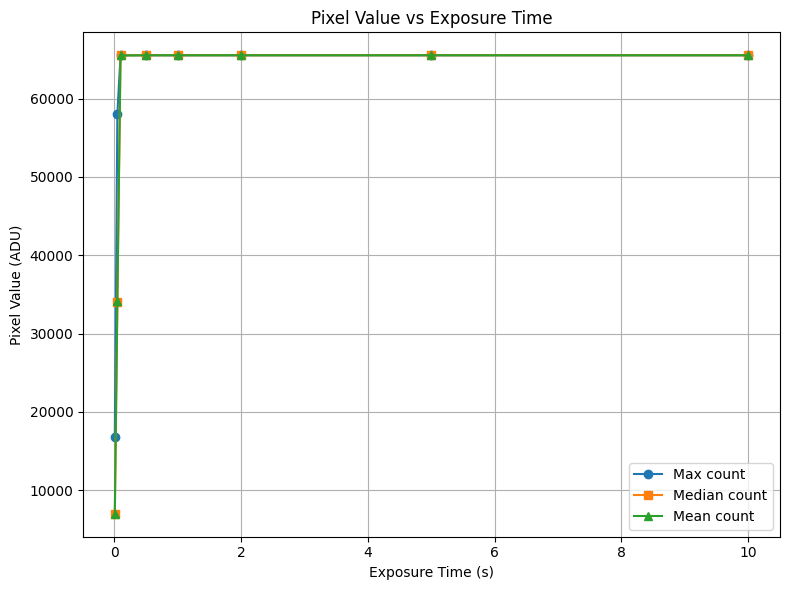

In [4]:
# Arrays to store statistics
max_counts = []
median_counts = []
mean_counts = []

for tint in exposure_times:
    print(f"--- Exposure time: {tint/1e6:.3f} s ---")
    images = acquire_images(tint, Ncoadd, outdir=outdir, prefix=prefix)
    img = images[0] if images.ndim == 3 else images
    max_counts.append(np.max(img))
    median_counts.append(np.median(img))
    mean_counts.append(np.mean(img))
    print(f"Image shape: {img.shape}, dtype: {img.dtype}, Max: {np.max(img)}, Median: {np.median(img)}, Mean: {np.mean(img):.2f}")

# Convert to numpy arrays
max_counts = np.array(max_counts)
median_counts = np.array(median_counts)
mean_counts = np.array(mean_counts)

# Plot counts vs exposure time
plt.figure(figsize=(8,6))
plt.plot(exposure_times/1e6, max_counts, 'o-', label='Max count')
plt.plot(exposure_times/1e6, median_counts, 's-', label='Median count')
plt.plot(exposure_times/1e6, mean_counts, '^-', label='Mean count')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Pixel Value (ADU)')
plt.title('Pixel Value vs Exposure Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Student Exercise: Identify Saturation Point

- At which exposure time do you first observe saturation in the image or histogram?
- What is the maximum pixel value for your detector? (Check the histogram's x-axis.)
- Why is it important to avoid saturation in scientific imaging?

Discuss your findings with your classmates or instructor.